### Import important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import statsmodels
from statsmodels.stats.weightstats import ztest as zt
import scipy.stats as st
from scipy import stats as st
import scipy.stats

### Reading Dataset

In [2]:
s=sns.load_dataset("titanic")

In [3]:
s

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Check the length of Dataset

In [4]:
s.shape

(891, 15)

### Reading the head of  Dataset

In [5]:
s.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Reading the tail of Dataset

In [6]:
s.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


### Checking all numerical columns max,min,mean,median,count,std

In [45]:
s.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Checking  Dtype of all the columns

In [8]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Checking unique values of all the columns

In [9]:
s.apply(lambda x:x.unique())

survived                                                  [0, 1]
pclass                                                 [3, 1, 2]
sex                                               [male, female]
age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
sibsp                                      [1, 0, 3, 4, 2, 5, 8]
parch                                      [0, 1, 2, 5, 3, 4, 6]
fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
embarked                                          [S, C, Q, nan]
class          ['Third', 'First', 'Second']
Categories (3, ob...
who                                          [man, woman, child]
adult_male                                         [True, False]
deck           [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categ...
embark_town            [Southampton, Cherbourg, Queenstown, nan]
alive                                                  [no, yes]
alone                                              [False, True]
dtype: object

### Checking missing values 

In [10]:
s.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Filling missing value of age by median value

In [12]:
s["age"].median()

28.0

In [13]:
s["age"].fillna(s["age"].median(),inplace=True)

In [14]:
s.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Filling missing value of embarked column by mode

In [15]:
s["embarked"].mode()[0]

'S'

In [16]:
s["embarked"].fillna(s["embarked"].mode()[0],inplace=True)

In [17]:
s.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Filling missing value of embark_town column with mode value

In [18]:
s["embark_town"].mode()[0]

'Southampton'

In [19]:
s["embark_town"].fillna(s["embark_town"].mode()[0],inplace=True)

In [20]:
s.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [21]:
s

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Checking surviving sex counts

In [44]:
pd.DataFrame(s.groupby(["survived"])["sex"].value_counts())

sex
survived sex        
0        male    468
         female   81
1        female  233
         male    109

### checking who column surviving count 

In [43]:
pd.DataFrame(s.groupby(["survived"])["who"].value_counts())

who
survived who       
0        man    449
         woman   66
         child   34
1        woman  205
         man     88
         child   49

### Checking count of people survived of different town

In [42]:
pd.DataFrame(s.groupby(["survived"])["embark_town"].value_counts())

embark_town
survived embark_town             
0        Southampton          427
         Cherbourg             75
         Queenstown            47
1        Southampton          219
         Cherbourg             93
         Queenstown            30

### Alone from different town

In [25]:
pd.crosstab(s["embark_town"],s["alone"])

alone,False,True
embark_town,,
Cherbourg,83,85
Queenstown,20,57
Southampton,251,395


### Countplot embark_town column

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


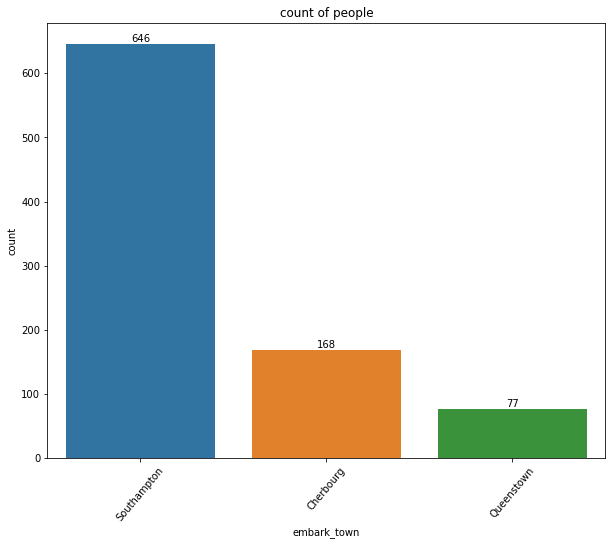

In [26]:
plt.figure(figsize=(10,8))
plt.title("count of people")
plt.xticks(rotation=50)
x=sns.countplot(s["embark_town"])
for i in x.containers:
    x.bar_label(i)


### relplot to find sex and embarked_town and survived age people paying fare

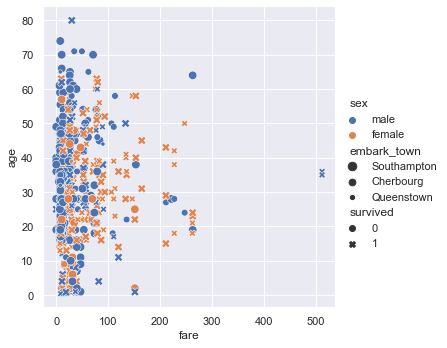

In [27]:
sns.set(style="darkgrid")
sns.relplot(x="fare",y="age",data=s,hue="sex",size="embark_town",style="survived")

In [40]:
pd.DataFrame(s.columns)

,0
0,survived
1,pclass
2,sex
3,age
4,sibsp
5,parch
6,fare
7,embarked
8,class
9,who


### Finding the top 3 paying ticket

In [41]:
pd.DataFrame(s[s["fare"]>=512]["sex"])

,sex
258,female
679,male
737,male


### Finding the pclass min,max,mean fear

In [30]:
s.groupby(["pclass"])["fare"].agg(["max","min","mean"])

,max,min,mean
pclass,,,
1,512.3292,0.0,84.154687
2,73.5000,0.0,20.662183
3,69.5500,0.0,13.675550


### pie chart alone column

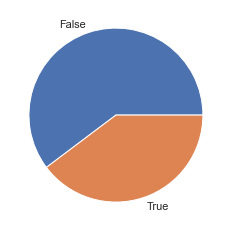

In [31]:
plt.pie(s["alone"].value_counts(),labels=s["alone"].unique());

### Finding fear of sibsp

In [38]:
pd.DataFrame(s[s["fare"]>0]["sibsp"].value_counts())

,sibsp
0,593
1,209
2,28
4,18
3,16
8,7
5,5


### Finding fare of parch

In [39]:
pd.DataFrame(s[s["fare"]>0]["parch"].value_counts())

,parch
0,663
1,118
2,80
5,5
3,5
4,4
6,1
